<a href="https://colab.research.google.com/github/VasundharaAgarwal/GANFingerprinting/blob/main/Fingerprint_Generation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import os
import random
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import sys
sys.path.append('/content/gdrive/My Drive/')

In [ ]:
import model_architectures as ma

In [ ]:
ngpu = 1 
nz = 100
manualSeed = 500

torch.manual_seed(manualSeed)
random.seed(manualSeed)
np.random.seed(manualSeed)

device = torch.device("cuda:0" if (torch.cuda.is_available() and ngpu > 0) else "cpu")

fixed_noise = torch.randn(1000,  ma.nz, 1, 1, device=device)
netG1 = ma.Generator1(ngpu)
model_dict1 = torch.load('/content/gdrive/My Drive/GANS/GAN_1')
netG1.load_state_dict(model_dict1['G_state_dict'])
netG1.to(device)
fake1 = netG1(fixed_noise).detach().cpu().numpy().reshape(1000,28,28)
netG3 = ma.Generator3(ngpu)
model_dict3 = torch.load('/content/gdrive/My Drive/GANS/GAN_3')
netG3.load_state_dict(model_dict3['G_state_dict'])
netG3.to(device)
fake3 = netG3(fixed_noise).detach().cpu().numpy().reshape(1000,28,28)

[[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
    1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   5.  41.  38.  17.  11.
   20. 122. 234. 238.  44.   5.   0.   0.   0.   0.   0.  

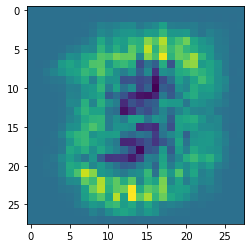

In [ ]:
residue_sum1 = np.zeros((28,28))
for i in range(1000):
  img = np.floor(fake1[i].reshape(28,28)*255)
  kernel = np.ones((5,5),np.float32)/25
  #dst = cv2.filter2D(img,-1, kernel)
  dst = cv2.medianBlur(img, 3)
  residue = img - dst
  residue_sum1 += residue
residue_sum1 /= 1000
plt.imshow(residue_sum1)


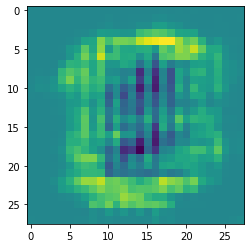

In [ ]:
residue_sum3 = np.zeros((28,28))
for i in range(1000):
  img = np.floor(fake3[i].reshape(28,28)*255)
  kernel = np.ones((5,5),np.float32)/25
  #dst = cv2.filter2D(img,-1, kernel)
  dst = cv2.medianBlur(img, 3)
  residue = img - dst
  residue_sum3 += residue
residue_sum3 /= 1000
plt.imshow(residue_sum3)

In [ ]:
manualSeed = 800

torch.manual_seed(manualSeed)
random.seed(manualSeed)
np.random.seed(manualSeed)


In [ ]:
fixed_noise = torch.randn(1000,  ma.nz, 1, 1, device=device)
fake1 = netG1(fixed_noise).detach().cpu().numpy().reshape(1000,28,28)
fake3 = netG3(fixed_noise).detach().cpu().numpy().reshape(1000,28,28)

In [ ]:
total = 0
for i in range(1000):
  img = np.floor(fake1[i].reshape(28,28)*255)
  #dst = cv2.filter2D(img,-1, kernel)
  dst = cv2.medianBlur(img, 3)
  coef1 = np.corrcoef(residue_sum1.reshape(28*28), (img - dst).reshape(28*28))[0][1]
  coef3 =  np.corrcoef(residue_sum3.reshape(28*28), (img - dst).reshape(28*28))[0][1]
  if coef1 > coef3:
    total+=1
total


815